In [1]:
# imports 

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from env import username, host, password

# functions
import acquire_wrangle as a

# analysis transformations and techniques

import statsmodels.api as sm

from datetime import timedelta, datetime
from sklearn.metrics import mean_squared_error
from math import sqrt 

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

## Acquisition & Exploration

In [2]:
# acquire data

temp = a.get_temp_data()

In [3]:
# look at data

temp.sample(3)

dt  AverageTemperature  AverageTemperatureUncertainty  \
117900  1991-12-01              -3.081                          0.211   
54914   1840-02-01               7.108                          2.204   
165659  1889-01-01               0.450                          1.536   

             City  Country Latitude Longitude  
117900       Kiev  Ukraine   50.63N    31.69E  
54914   Chongqing    China   29.74N   107.08E  
165659    Nanjing    China   31.35N   118.74E

**The target is being defined as average temperature.**

In [4]:
# shape of imported data

temp.shape

(239177, 7)

In [5]:
# looking at data

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [6]:
# checking nulls

temp.isna().sum() / len(temp)

dt                               0.000000
AverageTemperature               0.045999
AverageTemperatureUncertainty    0.045999
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

**We can see that 4.6pc of the rows have no data for 'AverageTemperature' and 'AverageTemperatureUncertainty'. This is deemed an insignificant amount, and the rows will be dropped.**

In [7]:
# changing col names, setting index to datetime, dropping nulls

temp = a.temp_time(temp)

In [8]:
# verifying that they dropped

temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228175 entries, 1849-01-01 to 2013-08-01
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   avg_temp    228175 non-null  float64
 1   avg_temp_q  228175 non-null  float64
 2   city        228175 non-null  object 
 3   country     228175 non-null  object 
 4   month       228175 non-null  object 
 5   year        228175 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 12.2+ MB


In [9]:
# sample of data 

temp.sample(3)

avg_temp  avg_temp_q              city country    month  year
date                                                                     
1750-01-01    -3.916       1.991  Saint Petersburg  Russia  January  1750
2006-07-01    26.799       0.214        Alexandria   Egypt     July  2006
1864-05-01    18.836       1.467            Peking   China      May  1864

In [10]:
# plotting Average Annual & Monthly Temperatures Around The World, 1750 To Present

plt.figure(figsize = (23, 23))

sns.scatterplot(data = temp, y = 'avg_temp', x = 'year', hue = 'month')

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.6))

plt.title('Average Annual & Monthly Temperatures Around The World, 1750 Through 2013')

Text(0.5, 1.0, 'Average Annual & Monthly Temperatures Around The World, 1750 Through 2013')

**This graph shows that there are some outliers in temperature, but that they are minimal. It also shows normal temperatures during different months, and that they have been relatively consistent throughout time.**

In [11]:
# plotting average temperature uncertainties ('avg_temp_q') against 'year'

plt.figure(figsize = (12, 12))

sns.regplot(data = temp, y = 'avg_temp_q', x = 'year', color = 'pink', 
            line_kws = {'color': 'red'})

plt.title('Average Annual Temperatures Around The World, 1750 Through 2013')

Text(0.5, 1.0, 'Average Annual Temperatures Around The World, 1750 Through 2013')

**This plot shows that there has been a decrease in average temperature uncertainty range (upper and lower ranges) since 1750.**

In [12]:
# countries

temp['country'].sort_values().unique()

array(['Afghanistan', 'Angola', 'Australia', 'Bangladesh', 'Brazil',
       'Burma', 'Canada', 'Chile', 'China', 'Colombia',
       'Congo (Democratic Republic Of The)', "Côte D'Ivoire",
       'Dominican Republic', 'Egypt', 'Ethiopia', 'France', 'Germany',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Japan', 'Kenya',
       'Mexico', 'Morocco', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Russia', 'Saudi Arabia', 'Senegal', 'Singapore', 'Somalia',
       'South Africa', 'South Korea', 'Spain', 'Sudan', 'Syria', 'Taiwan',
       'Tanzania', 'Thailand', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States', 'Vietnam', 'Zimbabwe'], dtype=object)

In [13]:
# cities

temp['city'].sort_values().unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome',
       'Saint Petersbu

In [14]:
# looking at Turkey

(temp['country'] == 'Turkey').sum()

9239

In [15]:
# assigning 'Turkey' data into new df

tk = temp[temp['country'] == 'Turkey']
tk.sample(3)

avg_temp  avg_temp_q      city country    month  year
date                                                             
1903-06-01    19.035       0.480  Istanbul  Turkey     June  1903
1929-01-01     4.080       1.254  Istanbul  Turkey  January  1929
2013-05-01    19.384       0.273  Istanbul  Turkey      May  2013

In [16]:
# assigning 'Istanbul' data into new df

tk = tk[tk['city'] == 'Istanbul']
tk.tail(3)


avg_temp  avg_temp_q      city country   month  year
date                                                            
2013-06-01    21.853       0.504  Istanbul  Turkey    June  2013
2013-07-01    23.553       0.515  Istanbul  Turkey    July  2013
2013-08-01    24.724       0.485  Istanbul  Turkey  August  2013

In [17]:
# date range

tk.index.min(), tk.index.max()

(Timestamp('1743-11-01 00:00:00'), Timestamp('2013-08-01 00:00:00'))

**The data goes from 01 Nov 1743 to 01 Aug 2013.**

In [18]:
# setting date to 1800 and later

tk = tk[tk['year'] >= 1800]

In [19]:
tk.head()

avg_temp  avg_temp_q      city country     month  year
date                                                              
1800-01-01     5.320       2.294  Istanbul  Turkey   January  1800
1800-02-01     6.053       3.295  Istanbul  Turkey  February  1800
1800-03-01     4.949       2.657  Istanbul  Turkey     March  1800
1800-04-01    14.149       2.052  Istanbul  Turkey     April  1800
1800-05-01    16.493       1.798  Istanbul  Turkey       May  1800

In [20]:
# dropping city, country cols

tk = tk.drop(columns = ['city', 'country'])

## Splitting Into TVT

In [21]:
# splitting data

train_long = int(0.5 * len(tk))

val_test_fen = int(0.7 * len(tk))

train_long, val_test_fen

(1282, 1794)

In [22]:
# splitting data into TVT

train = tk.iloc[:train_long]

val = tk.iloc[train_long:val_test_fen]

test = tk.iloc[val_test_fen:]

train.shape, val.shape, test.shape

((1282, 4), (512, 4), (770, 4))

In [23]:
# look at train

train.sample(3)

avg_temp  avg_temp_q  month  year
date                                         
1870-03-01     7.101       0.910  March  1870
1855-06-01    20.728       3.084   June  1855
1874-04-01    11.977       0.252  April  1874

In [24]:
# date range

train.index.min(), train.index.max()

(Timestamp('1800-01-01 00:00:00'), Timestamp('1906-10-01 00:00:00'))

**The train dataset contains data from 01 Jan 1800 to 01 Oct 1906.**

In [25]:
# plotting Average Annual & Monthly Temperatures In Turkey, 1800 Through 1906

plt.figure(figsize = (18, 12))

sns.scatterplot(data = train, y = 'avg_temp', x = 'year', hue = 'month')

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.6))

plt.title('Average Annual & Monthly Temperatures In Istanbul, Turkey, 1800 Through 1906')

Text(0.5, 1.0, 'Average Annual & Monthly Temperatures In Istanbul, Turkey, 1801 Through 1907')

**The above graph demonstrates the consistency in seasonality in temperatures in Istanbul, with relatively little variance over the centuries.**

Text(0.5, 1.0, 'Average Temperature Uncertainty In Istanbul, 1801 Through 1907')

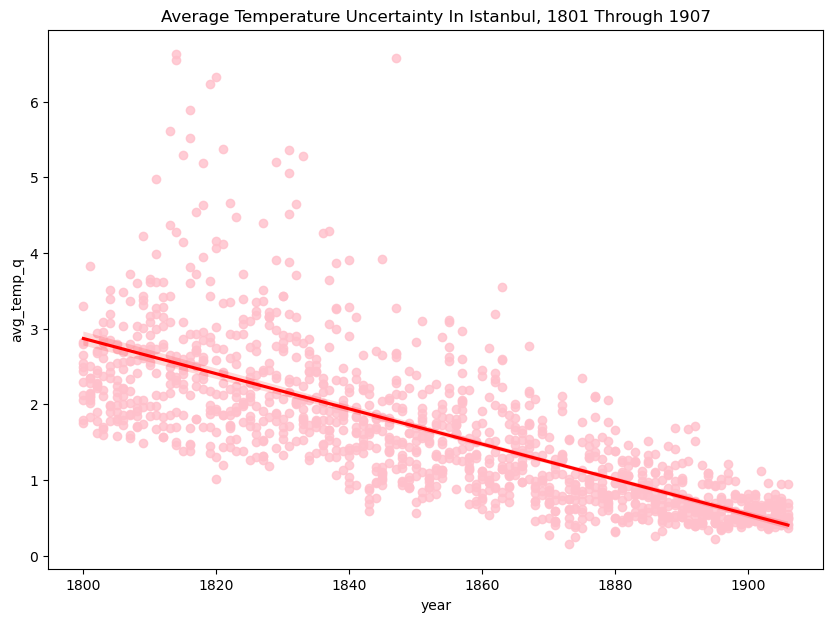

In [26]:
# plotting average temperature uncertainties ('avg_temp_q') against 'avg_temp'

plt.figure(figsize = (10, 7))

sns.regplot(data = train, y = 'avg_temp_q', x = 'year', color = 'pink', 
            line_kws = {'color': 'red'})

plt.title('Average Temperature Uncertainty In Istanbul, 1800 Through 1906')

**The above graph shows that as the years passed, the average temperature uncertainty in Istanbul decreased.**

In [27]:
# highest average temp

train['avg_temp'].idxmax()

Timestamp('1841-07-01 00:00:00')

In [28]:
# lowest average temp

train['avg_temp'].idxmin()

Timestamp('1813-01-01 00:00:00')

In [29]:
# avg monthly temp 1801 to 1907

train['avg_temp'].plot()

<AxesSubplot:xlabel='date'>

In [30]:
# Seasonal decomposition using moving averages

# plt.title('Seasonal Decomposition For 4-Month Periods In Istanbul, 1800 To 1906')

# plt.figure(figsize = (20, 5))

seasonal = sm.tsa.seasonal_decompose(train['avg_temp'].resample('4m').mean())

seasonal.plot()


None


**The above seasonal decomposition plots show that the temperatures in Istanbul from 1801 to 1907 over 4-month periods remained relatively consistent, with variance within about 2ºC ('Trend').**

<AxesSubplot:xlabel='date'>

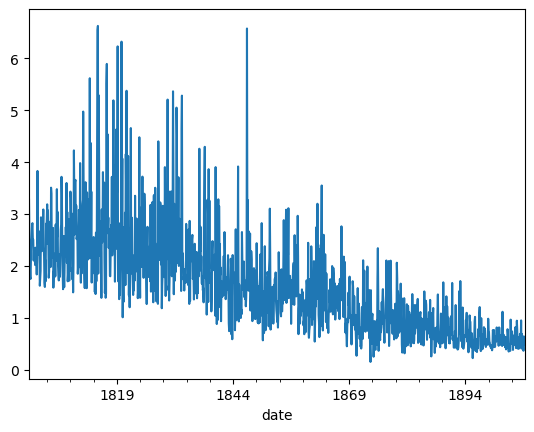

In [31]:
train['avg_temp_q'].plot()

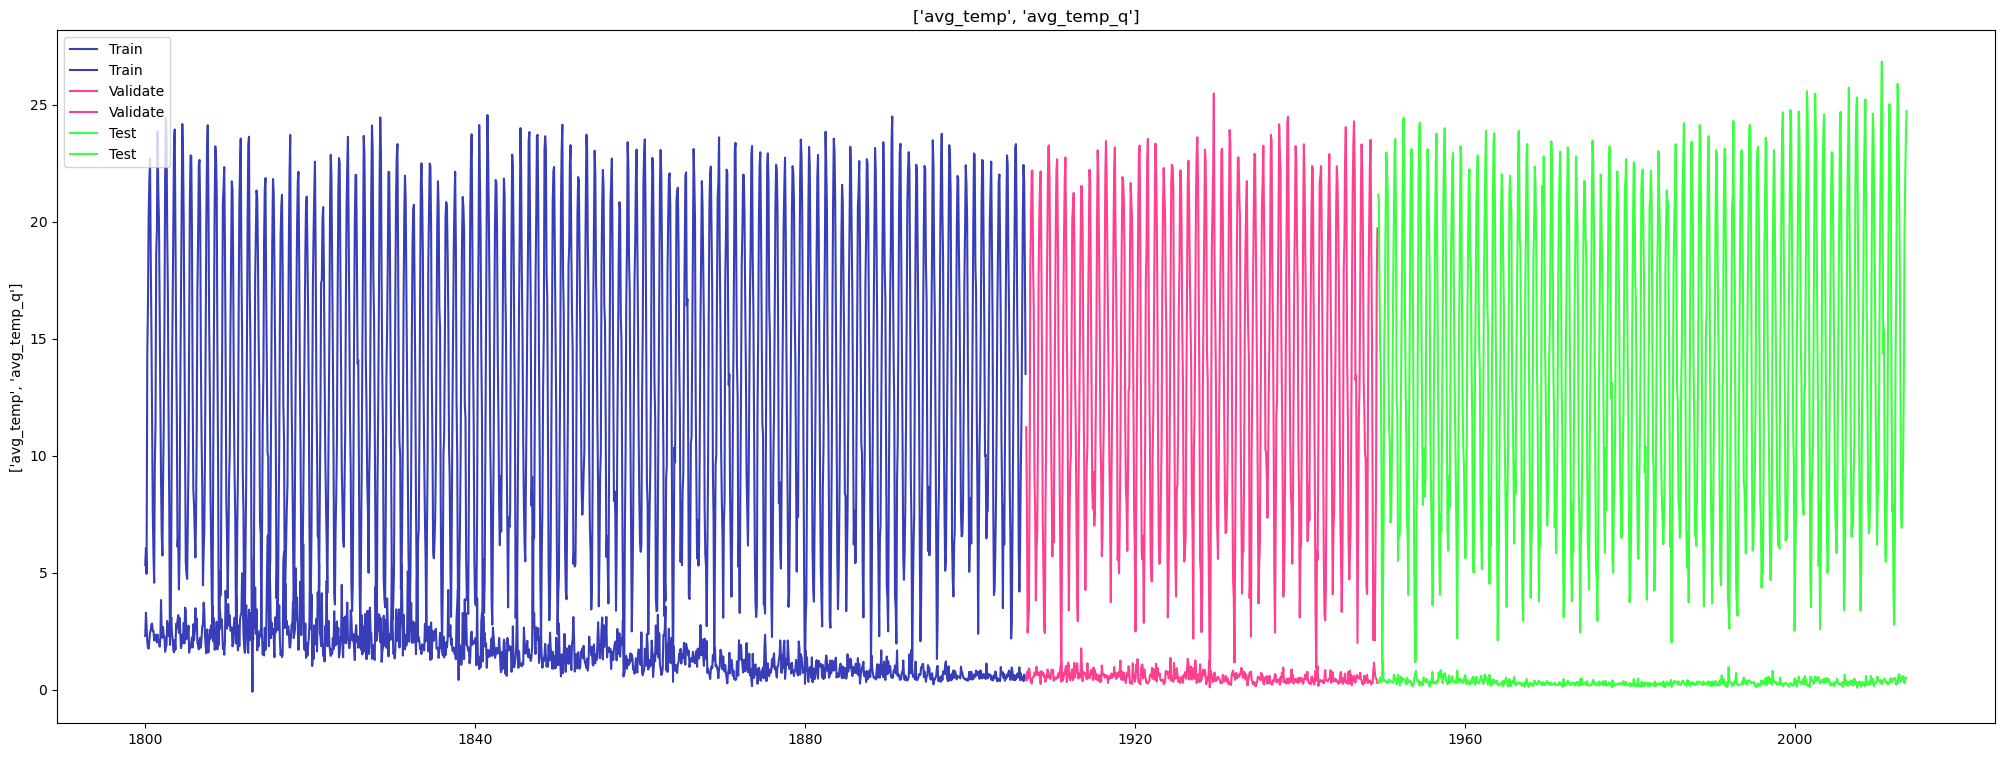

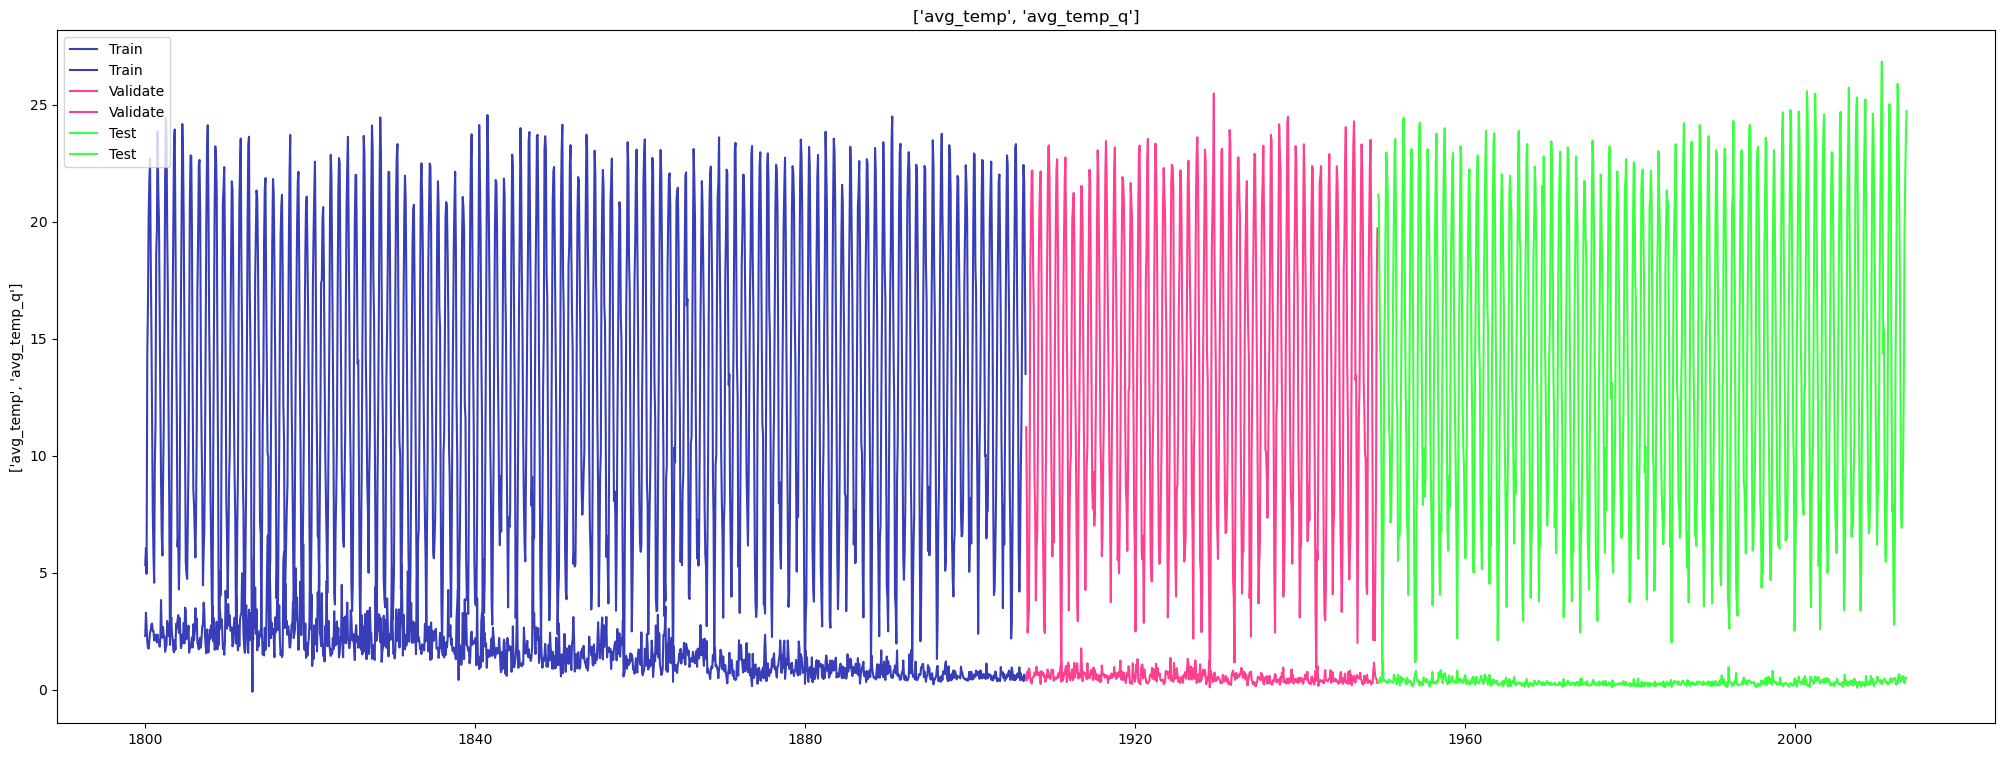

In [50]:
col = ['avg_temp', 'avg_temp_q']

for c in col :
    
    plt.figure(figsize = (25,9))
    
    plt.plot(train[col], color = '#373eb8', label = 'Train')
    plt.plot(val[col], color = '#ff3f90', label = 'Validate')
    plt.plot(test[col], color = '#3dff42', label = 'Test')
    
    plt.legend()
    plt.ylabel(col)
    plt.title(col)
    plt.show()

## Analyse

## Last-Observed Value

In [51]:
# take the final item of 'avg_temp' in trainand assign to variable

last_temp = train['avg_temp'][-1:][0]
last_temp

13.49

In [59]:
# create baseline (yhat)

yhat_df = pd.DataFrame({'avg_temp' : last_temp}, index = val.index)

yhat_df.sample(3)

avg_temp
date                
1946-02-01     13.49
1916-01-01     13.49
1947-12-01     13.49

In [58]:
# get the rmse

rmse = round(sqrt(mean_squared_error(val['avg_temp'], yhat_df['avg_temp'])), 0)
print(f'The RMSE for last-observed value on train is {rmse}.')

The RMSE for last-observed value on train is 7.0.


The RMSE is 7.0


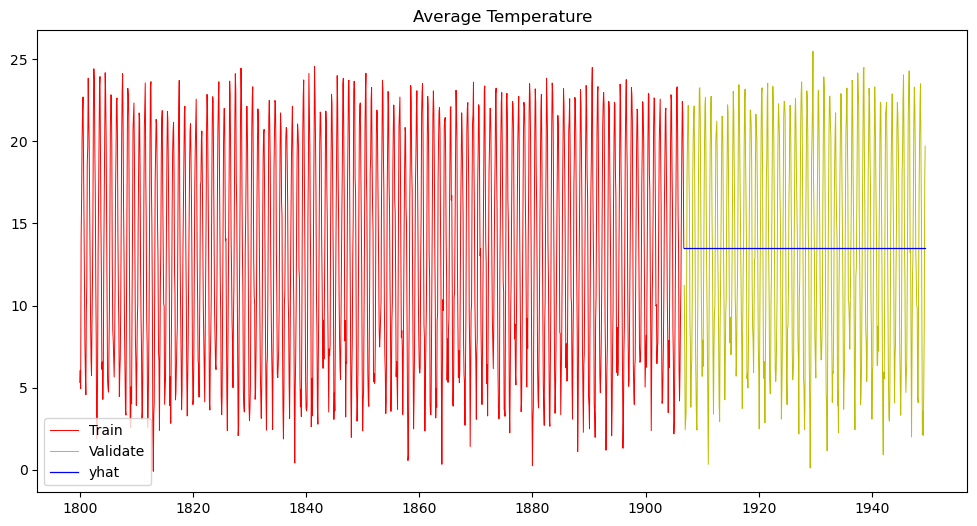

In [60]:
# p.plot_eval(train, val, yhat_df, 'avg_temp')

plt.figure(figsize = (12, 6))
    
plt.plot(train['avg_temp'], label = 'Train', linewidth = 0.7, color = 'r')
plt.plot(val['avg_temp'], label = 'Validate', linewidth = 0.7, color = 'y')
plt.plot(yhat_df['avg_temp'], label = 'yhat', linewidth = 0.9, c = 'b')
    
plt.legend()
plt.title('Average Temperature')
    
print(f'The RMSE is {rmse}')
    
plt.show()


In [63]:
# create an empty dataframe

eval_df = pd.DataFrame(columns = ['model_type', 'target', 'RMSE'])

eval_df

Empty DataFrame
Columns: [model_type, target, RMSE]
Index: []

In [64]:
# adding 'last_observed_value' results to eval_df
    
d = {'model_type': ['last_observed_value'], 'target': ['avg_temp'],
        'RMSE': [rmse]}
    
d = pd.DataFrame(d)
    
eval_df.append(d, ignore_index = True)

model_type    target  RMSE
0  last_observed_value  avg_temp   7.0

## Simple Average

In [65]:
# compute simple average of 'avg_temp' (from train data)

avt = round(train['avg_temp'].mean(), 2)

print(f'The simple average is {avt}.')

The simple average is 13.22.
